# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

Automated facial expression recognition provides an objective assessment of emotions. Human based assessment of emotions has many limitations and biases and automated facial expression technology has been found to deliver a better level of insight into behavior patterns. Emotion detection from facial expressions using AI is useful in automatically measuring consumers’ engagement with their content and brands, audience engagement for advertisements, customer satisfaction in the retail sector, psychological analyses, law enforcement etc.

In [ ]:
#@title Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Hackathon3b_expression_recognition.mp4" type="video/mp4">
</video>
""")

**Objectives:** 

**Stage 4 (15 Marks):** Train a CNN Model and perform Expression Recognition in the EFR Mobile App.

**Stage 5 (5 Marks):** Test for Anti-Face Spoofing on the EFR Mobile App.

##**Stage 4 (15 Marks)**

**(i) Train a CNN Model for Expression Recognition on given Expression data  
(ii) Deploy the Model and Perform Expression Recognition on Team Data through the EFR Mobile App**


---


* Define and train a CNN for expression recognition for the data under folder "Expression_data" which segregated on expression basis.
* Collect your team data using EFR application and test your model on the same and optimize the CNN architecture for predicting the respective labels of the images.
* Save and Download the trained expression model and upload them in the ftp server (refer to [Filezilla Installation and Configuration document](https://drive.google.com/file/d/1laYeOFoHQdIcyo7y7K8kfvB6bNZs2C9B/view?usp=sharing)).

* Update the **“exp_recognition.py”** file in the server. Open the files in the terminal (Command prompt) and provide the code for predicting the expression on the face (Note: To define the architecture of your trained model, you'll need to define it in the file **"exp_recognition_model.py"**). 

* Test your model on the mobile app for Expression Recognition and Sequence Expression. Your team can also see your results in your terminal.


* Grading Scheme:
> * Expression Recognition (12M): If the functionality is returning expression class correctly for the face using the mobile app’s “Expression Recognition” functionality
> * Sequence Expression (3M): Get three consecutive correct Expressions using the mobile app’s “Sequence Expressions” functionality

**Download the dataset**

In [ ]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M3_Hackathon" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Expression_data.zip")
    
    ipython.magic("sx unzip Expression_data.zip")

    # ipython.magic("sx wget wget https://cdn.talentsprint.com/aiml/FaceRecogHackathon/Datasets/IMFDB_face_recog/IMFDB_final-20190607T024441Z-001.zip")
    
    # ipython.magic("sx unzip IMFDB_final-20190607T024441Z-001.zip")
    
    ipython.magic("sx pip install torch==1.0.1 -f https://download.pytorch.org/whl/cu100/stable")
    ipython.magic("sx pip install torchvision==0.2.1")
    ipython.magic("sx pip install opencv-python")
    print ("Setup completed successfully")
    return
setup()

Setup completed successfully


**Dataset attributes:**

During the setup you have downloaded the Expression data:

* **Expression_data**: In this folder, the images are segregrated in terms of Expression
> * Expressions available: ANGER, DISGUST, FEAR, HAPPINESS, NEUTRAL, SADNESS, SURPRISE
> * Each class is organised as one folder
> * There are ~18000 total images in the training data and ~4500 total images in the testing data

In [ ]:
%ls

Expression_data/  Expression_data.zip  __MACOSX/  sample_data/


**Imports: All the imports are defined here**

We are installing the following specific package versions -> torch 1.0.1, torchvision 0.2.1 and PIL 5.3.0 to maintain compatibility with the server 

* Firstly uninstall and downgrade the current PIL version. In the next cell, you will see a button "Restart Runtime" button appear below. 
* Click on it and select 'Yes' to restart runtime and reset the PIL package. 
* **DO NOT** go to the notebook's **RUNTIME  -> RESTART RUNTIME**. This will restart all packages and you will need to repeat all the steps from beginning.


* Simply continue with the next code cell

PIL (Pillow) is the Python Image Library. Used to cut and resize images, or do simple manipulation.


In [ ]:
!pip uninstall -y Pillow

Uninstalling Pillow-7.0.0:
  Successfully uninstalled Pillow-7.0.0


In [ ]:
# IGNORE ERROR. Click on Restart Runtime button and slect 'Yes' if prompts. Then proceed with the next code cell.
!pip install Pillow==5.3.0

     |████████████████████████████████| 2.0MB 3.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
# When you run this, it should give you pil version = 5.3.0
import PIL
print(PIL.__version__)

5.3.0


In [ ]:
%matplotlib inline
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import random
from PIL import Image
import torch
from torch.autograd import Variable
import PIL.ImageOps    
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import os
import warnings
from time import sleep
import sys
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
import seaborn as sns; sns.set()
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform, util, io

In [ ]:
torch.manual_seed(36)
torch.cuda.manual_seed(36)
np.random.seed(36)
random.seed(36)
torch.backends.cudnn.enabled=False
torch.backends.cudnn.deterministic=True

In [ ]:
!pip install git+https://github.com/aleju/imgaug
from imgaug import augmenters as iaa
import imgaug as ia

  Cloning https://github.com/aleju/imgaug to /tmp/pip-req-build-uut7bw4l
  Running command git clone -q https://github.com/aleju/imgaug /tmp/pip-req-build-uut7bw4l
  Created wheel for imgaug: filename=imgaug-0.4.0-cp36-none-any.whl size=971107 sha256=435207ccf25dbe7ceba55dbcb89119c00e72ed5176afd71eebb1fa8364696c9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-v9whxd6g/wheels/9c/f6/aa/41dcf2f29cc1de1da4ad840ef5393514bead64ac9e644260ff
Successfully built imgaug
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


For the following step, to obtain hints on building a CNN model for face expression, you may refer to this [article](https://drive.google.com/open?id=1P2rpaWW3tOtGGnw4dvtdZ4hjoc8iDNst)

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=5, stop_point=10, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int)  : How long to wait after last time validation loss improved to reduce learning rate.
                            Default: 5
            stop_point (int): How long to wait after last time validation loss improved to stop training.
                            Default: 10
            verbose (bool)  : If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float)   : Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str)      : Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.stop_point = stop_point
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.lr_reduce = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.stop_point}')
            if self.counter >= self.stop_point:
                self.early_stop = True
            if self.counter == self.patience:
                self.lr_reduce = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0
            self.lr_reduce = False

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

(80, 114)


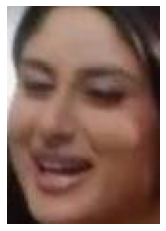

In [ ]:
from PIL import Image
img_raw = Image.open("/content/Expression_data/Facial_expression_train/HAPPINESS/ 16248.jpg")
plt.imshow(img_raw)
plt.axis('off')
print(img_raw.size)

In [ ]:
img_ar = np.array(img_raw)
img_ar.shape, img_ar.size

((114, 80, 3), 27360)

In [ ]:
image_size = (48,48)
transformations = transforms.Compose([
                                  torchvision.transforms.Grayscale(),
                                  torchvision.transforms.Resize(image_size), 
                                  torchvision.transforms.ToTensor(), 
                                  torchvision.transforms.Normalize(mean=[0.5,], std=[0.5,])])


# choose the training and test datasets
train_data = dset.ImageFolder('/content/Expression_data/Facial_expression_train', transform = transformations)
test_data = dset.ImageFolder('/content/Expression_data/Facial_expression_test', transform = transformations)

In [ ]:
len(train_data.classes)

7

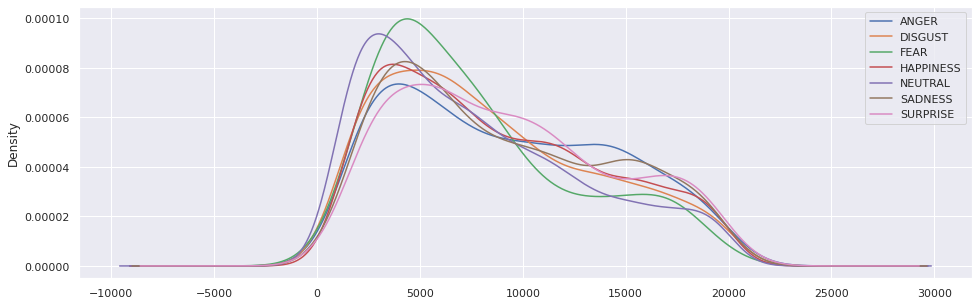

In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ['Emotion', 'Shape', 'Size'])
images_path="/content/Expression_data/Facial_expression_train" #path to original images

folders = train_data.classes

for folder in folders:
  upd_path = images_path + '/' + folder
  for im in os.listdir(upd_path):
    work_image = Image.open(upd_path + '/' + im)
    df = df.append({'Emotion': folder, 'Shape': np.array(work_image).shape, 'Size': np.array(work_image).size}, ignore_index=True)

plt.figure(figsize=(16,5))
df[df['Size'] <= 20000].groupby('Emotion').Size.plot(kind='kde')
plt.ticklabel_format(style='plain', axis='both')
plt.legend()
plt.show()

In [ ]:
def get_counts(data_set):
  counts = [0] * len(data_set.classes)
  for data, label in data_set:
    counts[label] += 1
  return counts

In [ ]:
train_counts = get_counts(train_data)
# test_counts = get_counts(test_data)

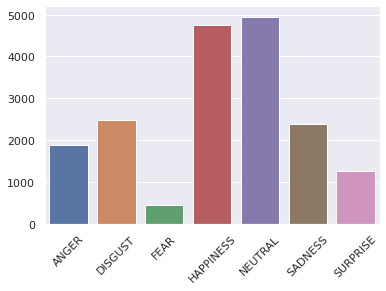

In [ ]:
plt.xticks(rotation=45)
sns.barplot(train_data.classes,train_counts)
plt.show()

In [ ]:
sum(train_counts), train_counts

(18178, [1877, 2488, 456, 4760, 4952, 2393, 1252])

In [ ]:
class ImgAugTransform:
  def __init__(self):
    # self.aug = iaa.Sequential([
    #     # iaa.Resize(image_size),
    #     iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
    #     iaa.Fliplr(0.5),
    #     iaa.ChangeColorTemperature((1100, 10000)),
    #     iaa.Affine(rotate=(-20, 20), mode='symmetric'),
    #     iaa.Sometimes(0.25,
    #                   iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
    #                              iaa.CoarseDropout(0.1, size_percent=0.5)])),
    #     iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    # ])
      self.aug = iaa.Sequential([
          iaa.Fliplr(0.5), # horizontal flips
          iaa.Crop(percent=(0, 0.1)), # random crops
          # Small gaussian blur with random sigma between 0 and 0.5.
          # But we only blur about 50% of all images.
          iaa.Sometimes(
              0.5,
              iaa.GaussianBlur(sigma=(0, 0.5))
          ),
          # Strengthen or weaken the contrast in each image.
          iaa.LinearContrast((0.75, 1.5)),
          # Add gaussian noise.
          # For 50% of all images, we sample the noise once per pixel.
          # For the other 50% of all images, we sample the noise per pixel AND
          # channel. This can change the color (not only brightness) of the
          # pixels.
          iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
          # Make some images brighter and some darker.
          # In 20% of all cases, we sample the multiplier once per channel,
          # which can end up changing the color of the images.
          iaa.Multiply((0.8, 1.2), per_channel=0.2),
          # Apply affine transformations to each image.
          # Scale/zoom them, translate/move them, rotate them and shear them.
          # iaa.Affine(
          #     scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
          #     translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
          #     rotate=(-25, 25),
          #     shear=(-8, 8)
          # )
      ], random_order=True)
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

In [ ]:
images_path="/content/Expression_data/Facial_expression_train" #path to original images
aug_path="/content/Aug_data"

imgtrans = ImgAugTransform()

folders = train_data.classes

for folder in folders:
  upd_path = images_path + '/' + folder
  train_path = aug_path + '/train/' + folder
  val_path = aug_path + '/val/' + folder
  os.makedirs(train_path) 
  os.makedirs(val_path) 
  for idx in range(4800):
    im_size = 0
    while im_size < 10000:
      work_image = Image.open(upd_path + '/' + random.choice(os.listdir(upd_path)))
      im_size = np.array(work_image).size
    aug_img = imgtrans(work_image)
    if idx < 4000:
      Image.fromarray(aug_img).save(train_path + '/Image_' + str(idx) + '.jpg')
    else:
      # Storing the original images in val dataset, not the augmented ones.
      work_image.save(val_path + '/Image_' + str(idx) + '.jpg')

In [ ]:
# import shutil
# shutil.rmtree('/content/Aug_data')

In [ ]:
train_a_data = dset.ImageFolder('/content/Aug_data/train', transform = transformations)
val_data = dset.ImageFolder('/content/Aug_data/val', transform = transformations)

In [ ]:
train_a_counts = get_counts(train_a_data)
val_counts = get_counts(val_data)

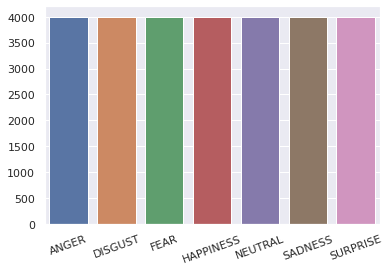

In [ ]:
plt.xticks(rotation=20)
sns.barplot(train_a_data.classes,train_a_counts)
plt.show()

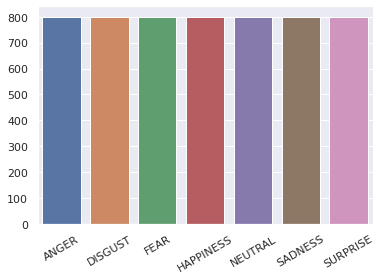

In [ ]:
plt.xticks(rotation=30)
sns.barplot(val_data.classes,val_counts)
plt.show()

In [ ]:
len(train_a_data), len(val_data)

(28000, 5600)

In [ ]:
#Loading the dataset
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_a_data,batch_size=batch_size,shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_data,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=True)

**Define and train a CNN model for expression recognition**

In [ ]:
# YOUR CODE HERE to define and train CNN model for Expression_Data.

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution Layer 1 
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2), # output size of the first convolutional layer is 3*48*48
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), # Maxpooling reduces the size by kernel size. 
            nn.Dropout(0.3),
        )
        #output size of first layer is 16x24x24

        # Convolution Layer 2
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=4, stride=1, padding=1), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), 
            nn.Dropout(0.3),
        )
        #output size of second layer is 32x12x12
        
        # Convolution Layer 3
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2), 
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), 
            nn.Dropout(0.2),
        )
        #output size of third layer is 64x6x6
                
        # YOUR CODE HERE for defining the Fully Connected Layer and also define LogSoftmax
        self.fc1 = nn.Linear(1024, 256)
        nn.init.xavier_normal_(self.fc1.weight)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc1_drop = nn.Dropout(0.3)
        #fc2
        self.fc2 = nn.Linear(256,7)
        nn.init.xavier_normal_(self.fc2.weight)
        
    
    def forward(self, x):
        # YOUR CODE HERE for the Convolutional Layers and Maxpool based on the defined Convolutional layers
        out1 = self.layer1(x)
        out2 = self.layer2(out1)
        out3 = self.layer3(out2)

        # YOUR CODE HERE for flattening the output of the final pooling layer to a vector. Flattening is simply arranging the 3D volume of numbers into a 1D vector
        out3 = out3.view(out3.size(0), -1)
        out4 = self.fc1_drop(F.relu(self.bn1(self.fc1(out3))))
        # out6 = self.fc2_drop(F.relu(self.bn2(self.fc2(out5))))
        out5 = self.fc2(out4)

        # YOUR CODE HERE for returning the output of LogSoftmax after applying Fully Connected Layer
        return out5

In [ ]:
### To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
device

Using PyTorch version: 1.0.1 CUDA: True


device(type='cuda')

**Test your model and optimize CNN architecture for predicting the labels correctly**

In [ ]:
def train_model(model, batch_size, patience, n_epochs, learning_rate):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, stop_point=stop_point, verbose=True)
    
    for epoch in range(1, n_epochs + 1):
        if epoch == 1:
            # learning_rate /= 2
            # optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
            optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9, weight_decay=0.0001)

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for batch, (data, target) in enumerate(train_loader, 1):
            # clear the gradients of all optimized variables
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in valid_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            data, target = data.to(device), target.to(device)
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        epoch_len = len(str(n_epochs))
        
        print_msg = (f'lr: {learning_rate} ' +
                     f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        
        print(print_msg)
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        
        # early_stopping needs the validation loss to check if it has decreased, 
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model)
        
        if early_stopping.lr_reduce:
            learning_rate /= 2
            # optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
            optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9, weight_decay=0.0001)
            print("Reducing Learing rate to ", learning_rate)

        if early_stopping.early_stop:
            print("Early stopping")
            break
        
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    return  model, avg_train_losses, avg_valid_losses

In [ ]:
model = CNNModel()
model = model.to(device)
print(model)

CNNModel(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.3)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.3)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2)
  )
  (fc1): Linear(in_features=1024, out_featu

In [ ]:
%%time
n_epochs = 1000
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9, weight_decay=0.0001)
# optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

# early stopping patience; how long to wait after last time validation loss improved.
patience = 5
stop_point = 10

model, train_loss, valid_loss = train_model(model, batch_size, patience, n_epochs, learning_rate)

lr: 0.01 [   1/1000] train_loss: 1.98367 valid_loss: 1.91102
Validation loss decreased (inf --> 1.911017).  Saving model ...
lr: 0.01 [   2/1000] train_loss: 1.93196 valid_loss: 1.89236
Validation loss decreased (1.911017 --> 1.892356).  Saving model ...
lr: 0.01 [   3/1000] train_loss: 1.90367 valid_loss: 1.88386
Validation loss decreased (1.892356 --> 1.883857).  Saving model ...
lr: 0.01 [   4/1000] train_loss: 1.87103 valid_loss: 1.82605
Validation loss decreased (1.883857 --> 1.826050).  Saving model ...
lr: 0.01 [   5/1000] train_loss: 1.84460 valid_loss: 1.81494
Validation loss decreased (1.826050 --> 1.814939).  Saving model ...
lr: 0.01 [   6/1000] train_loss: 1.81785 valid_loss: 1.77321
Validation loss decreased (1.814939 --> 1.773206).  Saving model ...
lr: 0.01 [   7/1000] train_loss: 1.79314 valid_loss: 1.75158
Validation loss decreased (1.773206 --> 1.751576).  Saving model ...
lr: 0.01 [   8/1000] train_loss: 1.77071 valid_loss: 1.74086
Validation loss decreased (1.75157

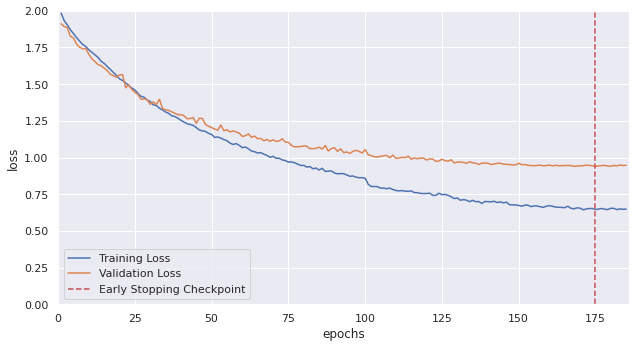

In [ ]:
fig = plt.figure(figsize=(9,5))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 2) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')
# plt.title('Learning rate ')

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(7))
class_total = list(0. for i in range(7))

model.eval() # prep model for evaluation

for data, target in test_loader:
    if len(target.data) != batch_size:
        break
    # forward pass: compute predicted outputs by passing inputs to the model
    data, target = data.to(device), target.to(device)
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(7):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.866654

Test Accuracy of     0: 37% (173/461)
Test Accuracy of     1: 28% (176/614)
Test Accuracy of     2: 16% (19/112)
Test Accuracy of     3: 51% (599/1172)
Test Accuracy of     4: 28% (351/1222)
Test Accuracy of     5: 28% (168/590)
Test Accuracy of     6: 31% (98/309)

Test Accuracy (Overall): 35% (1584/4480)


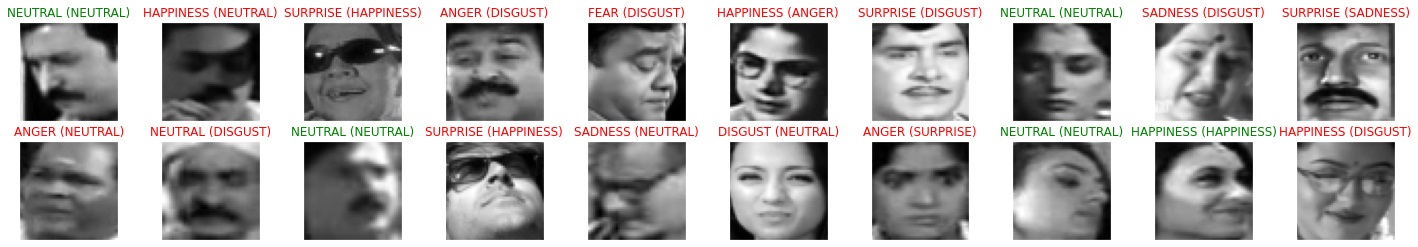

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

images, labels = images.to(device), labels.to(device)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(train_a_data.classes[preds[idx].item()], train_a_data.classes[labels[idx].item()]),
                 color=("green" if preds[idx]==labels[idx] else "red"))

**Team Data Collection (activate the server first)** 

  - (This can be done on the day of the Hackathon once the login username and password are given)

Activate the Server Access
* Open the terminal (Command Prompt)
* Login to SSH by typing **ssh (username)@aiml-sandbox1.talentsprint.com**. Give the login username which is given to you. 

Eg: `ssh b14h3gxx@aiml-sandbox1.talentsprint.com`

  (If it is your first time connecting to the server from this computer, accept the connection by typing "yes".)
* After logging into SSH, please activate your virtual environment using the
command **source venv/bin/activate** and then press enter
* You can start the server by giving the command **sh runserver.sh** and then press enter.
* In order to collect team data in mobile app, ensure the server is active


**Collect your team data using the EFR Mobile App and fine-tune the CNN for expression data on your team**

Team Data Collection

* Follow the "Mobile_APP_Documentation" to collect the Expression photos of your team. These will be stored in the server to which login is provided to you.

[Mobile_APP_Documentation](https://drive.google.com/file/d/1cF2wwn_h_Fr2GhvurnES9MuoUqMNTesa/view?usp=sharing)


**Download your team expression data from the EFR app into your colab notebook using the links provided below**

NOTE: Replace the string "username" with your login username (such as b14h3gxx) in the below cell for expression images. 

This data will be useful for testing the above trained cnn networks.

In [ ]:
!wget -nH --recursive --no-parent --reject 'index.*' https://aiml-sandbox.talentsprint.com/expression_detection/b14h3g09/captured_images_with_Expression/ --cut-dirs=3  -P ./captured_images_with_Expression

--2020-08-23 10:18:28--  https://aiml-sandbox.talentsprint.com/expression_detection/b14h3g09/captured_images_with_Expression/
Resolving aiml-sandbox.talentsprint.com (aiml-sandbox.talentsprint.com)... 139.162.203.12
Connecting to aiml-sandbox.talentsprint.com (aiml-sandbox.talentsprint.com)|139.162.203.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./captured_images_with_Expression/index.html.tmp’

index.html.tmp          [ <=>                ]   1.03K  --.-KB/s    in 0s      

2020-08-23 10:18:28 (88.6 MB/s) - ‘./captured_images_with_Expression/index.html.tmp’ saved [1054]

Loading robots.txt; please ignore errors.
--2020-08-23 10:18:28--  https://aiml-sandbox.talentsprint.com/robots.txt
Reusing existing connection to aiml-sandbox.talentsprint.com:443.
HTTP request sent, awaiting response... 404 Not Found
2020-08-23 10:18:29 ERROR 404: Not Found.

Removing ./captured_images_with_Expression/index.html.tmp since it should

In [ ]:
%ls

Aug_data/                         Expression_data/     __MACOSX/
captured_images_with_Expression/  Expression_data.zip  sample_data/
checkpoint.pt                     loss_plot.png


In [ ]:
# YOUR CODE HERE for loading the team expression data. Note: Use the same transform which used for Expression_Data.
# YOU CODE HERE for Dataloader
team_data = dset.ImageFolder('/content/captured_images_with_Expression', transform = transformations)
team_loader = torch.utils.data.DataLoader(team_data,batch_size=16,shuffle=True)

In [ ]:
early_stopping = EarlyStopping(patience=patience, stop_point=stop_point, verbose=True)
learning_rate = 0.01
team_losses = []
avg_team_losses = []
n_epochs = 100

for epoch in range(1, n_epochs + 1):
    if epoch == 1:
        optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9, weight_decay=0.0001)

    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for batch, (data, target) in enumerate(team_loader, 1):
        # clear the gradients of all optimized variables
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # record training loss
        team_losses.append(loss.item())

    # print training/validation statistics 
    # calculate average loss over an epoch
    team_loss = np.average(team_losses)
    avg_team_losses.append(team_loss)
    
    epoch_len = len(str(n_epochs))
    
    print_msg = (f'lr: {learning_rate} ' +
                  f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                  f'team_loss: {team_loss:.5f} ')
    
    print(print_msg)
    
    # clear lists to track next epoch
    train_losses = []
    
    # early_stopping needs the validation loss to check if it has decreased, 
    # and if it has, it will make a checkpoint of the current model
    early_stopping(team_loss, model)
    
    if early_stopping.lr_reduce:
        learning_rate /= 2
        # optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9, weight_decay=0.0001)
        print("Reducing Learing rate to ", learning_rate)

    if early_stopping.early_stop:
        print("Early stopping")
        break
    
# load the last checkpoint with the best model
model.load_state_dict(torch.load('checkpoint.pt'))


lr: 0.01 [  1/100] team_loss: 0.35128 
Validation loss decreased (inf --> 0.351277).  Saving model ...
lr: 0.01 [  2/100] team_loss: 0.44711 
EarlyStopping counter: 1 out of 10
lr: 0.01 [  3/100] team_loss: 0.41379 
EarlyStopping counter: 2 out of 10
lr: 0.01 [  4/100] team_loss: 0.40456 
EarlyStopping counter: 3 out of 10
lr: 0.01 [  5/100] team_loss: 0.38157 
EarlyStopping counter: 4 out of 10
lr: 0.01 [  6/100] team_loss: 0.41997 
EarlyStopping counter: 5 out of 10
Reducing Learing rate to  0.005
lr: 0.005 [  7/100] team_loss: 0.42436 
EarlyStopping counter: 6 out of 10
Reducing Learing rate to  0.0025
lr: 0.0025 [  8/100] team_loss: 0.44875 
EarlyStopping counter: 7 out of 10
Reducing Learing rate to  0.00125
lr: 0.00125 [  9/100] team_loss: 0.44872 
EarlyStopping counter: 8 out of 10
Reducing Learing rate to  0.000625
lr: 0.000625 [ 10/100] team_loss: 0.45636 
EarlyStopping counter: 9 out of 10
Reducing Learing rate to  0.0003125
lr: 0.0003125 [ 11/100] team_loss: 0.46666 
EarlySt

**Save your trained model**

* Save the state dictionary of the classifier (use pytorch only), It will be useful in
integrating model to the mobile app

 [Hint](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

In [ ]:
### YOUR CODE HERE for saving the CNN model
state = {
    'net_dict': model.state_dict()
}

torch.save(state, './CNN_basemodel.t7')

**Download your trained model**
* Given the path of model file the following code downloads it through the browser

In [ ]:
from google.colab import files
files.download('<model_file_path>')

##**Stage 5 (Anti Face Spoofing): (5 marks)**


---



The objective of anti face spoofing is to be able to unlock (say) a screen not just by your image
(which can be easily be spoofed with a photograph of yours) but by a switch in the expression
demanded by the Mobile App (which is much less probable to mimic)
* **Grading scheme**:
> * **Anti Face Spoofing**: (5M Only if both the cases mentioned below are achieved)
>>* **Unlock**: Correct face + Correct Demanded Expression
>>* **Stay Locked**: Correct face + Incorrect Demanded Expression (as you might imagine there are multiple other such possibilities, which you are free to explore)

In [ ]:
# Test in your mobile app and see if it gets unlock.